# Support Vector Machine (SVM)

- “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression.(우리는 classification에서 많이쓰여서 SVM이 분류모형에 쓰이는 것을 다룬다)
- SVM is one of the most popular machine learning model.
- It works well in complicated classification problem. 
- It is suitable for small and medium-sized datasets.
- It is sensitive to feature scale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

np.random.seed(42)
warnings.filterwarnings(action='ignore')

## Linear SVM Classification

- It is easier to understand SVM with figures. 

<img src="./img/svm_1.jpg" width="800" height="800">

- SVM모형은 n차원(특징의 개수 n) 공간에 data를 막 흩뿌려 놓았을 때 그 공간을 구분지어 나누는 n-1차원의 초평면(hyperplain)을 찾는 모형이다
- How can one classify into Versicolor and Setosa with a straight line? 
    - 이 경우에는 petal length와 width 2개의 feature가 있으므로 2차원 평면에 data가 흩뿌려져있고 그걸 특징지어 나누는 1차 직선이 있다.
- Which one is better? 
    - 결정 경계가 무수하지만 그래도 초록점선은 제대로 나누지 못하므로 열등한 경계이다
- Support Vector Machine is a frontier which best segregates the two classes $\rightarrow$ large margin classification
    - 즉 구분되는 data들로부터의 거리를 최대화하는 경계를 찾는다(오른쪽 그림참조)
    - 경계를 결정하는데에 모든 data를 사용하지 않고 분홍색 원되어있는 가장 경계와 가까운 점(벡터)들만을 이용하여 찾는다 이것을 support vector라고 한다.(support vector와 초평면 경계의 거리 = margin) 

### Hard margin vs. soft margin

- Hard margin given by Boser et al. (1992) and soft margin given by Vapnik et al. (1995)
- Soft margin is extended version of hard margin SVM.
    - soft margin은 data를 완전히 분리할 수 없고 margin안으로 data들이 침범하는 경우를 말한다
- Hard margin SVM can work only when data is completely linearly separable without any errors (noise or outliers). (data가 완전히 분리되는 경우)
- In case of errors (outliers, 침범하는 애들), either the margin is smaller or hard margin SVM fails. (see the figure below) $\rightarrow$ soft margin classification can allow margin violation 
- In sklearn, hyperparameter C: lower C $\rightarrow$ larger width, more margin violation
    - C는 cost이다 cost를 낮게 부여하면 침범하는 애들이 많아지고, 높게부여하면 적어진다
    - 그에 따라서 초평면의 기울기도 조금씩 달라진다(아래참조)
    
- 아래와 같은 경우는 소프트 마진 SVM을 사용해야하고 마진 안으로 데이터가 침범하는 것을 허용하고 그 침범정도를 C라는 파라미터로 조정한다

<img src="./img/svm_2.jpg" width="800" height="800">

- Large margin *vs* margin violations

<img src="./img/svm_3.jpg" width="800" height="800">

- Check how the value of C affect the size of margin and margin violation.

## Nonlinear SVM Classification

- Linear SVM is efficient and works well in many cases. However, there are many, many datsets that cannot be separated with a line or hyperplane. 
- See the example below:
  - The original dataset (in left figure) cannot be linearly separated. 
  - However, if we add another featue (quadratic in this case), we can!
  
- 선형으로 처리할 수 없는 경우에 높은 차원으로 사영시켜서 그 차원에서의 초평면을 구한다

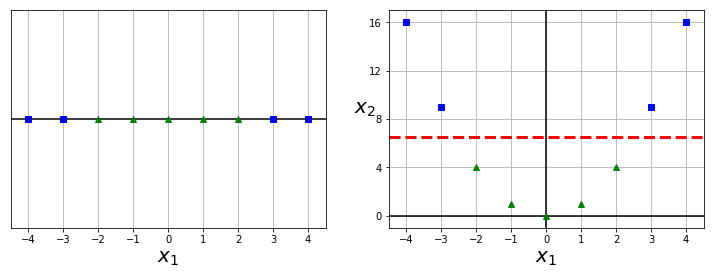

In [2]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

위의 그림은 왼쪽의 경우 구분을 짓는 초평면이 없다. 따라서 2차원 공간에 projection을 시켜서 나누어 주었다

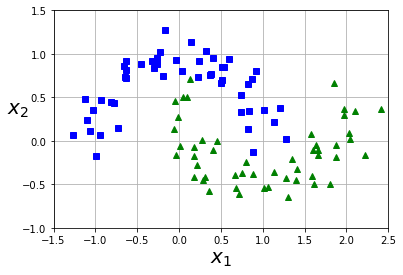

In [3]:
# sklearn moons datasets

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

위의 그림은 직선으로 나누기보다 non-linear 형태로 나누는 것이 낫다. 

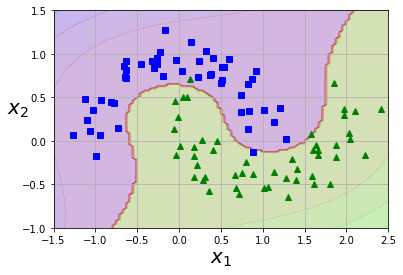

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Polynomial Kernel

- https://en.wikipedia.org/wiki/Polynomial_kernel
- **Kernel** is the function used to map a lower dimensional data into a higher dimensional data
    - 커널은 차원을 높여주는 함수
- left figure: 3rd degree, right figure: 10th degree
  - if a model overfits $\rightarrow$ lower the degree
  - if a model underfits  $\rightarrow$ raise the degree
- coef0 = constant term in polynomial
  - the effect of $x^n$ becomes very different when $n$ is high and $x$ is larger than 1
  - adjusting coef0 can reduce the effect of terms of higher degree
  - its default value is set to zero.

In [5]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [6]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

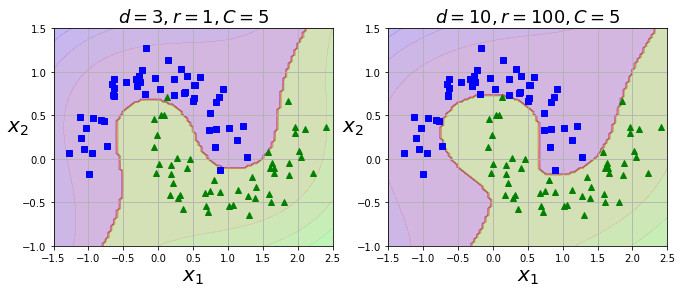

In [7]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

위의 그림은 각각 3차원 10차원으로 커널을 사용하여 늘리고 초평면을 나눈다음 다시 2차원평면 단면을 만든것이다.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

df = pd.read_csv('data/titanic.csv', index_col=0)
df.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [9]:
temp = pd.get_dummies(df[['sex', 'class', 'adult_male', 'alone']]).replace({False: 0, True:1})
temp = pd.concat([temp, df[['pclass', 'fare', 'sibsp', 'parch']]], axis=1)
temp.head()

,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,pclass,fare,sibsp,parch
0,1,0,0,1,0,0,1,3,7.2500,1,0
1,0,0,1,0,1,0,0,1,71.2833,1,0
2,0,1,1,0,0,0,1,3,7.9250,0,0
3,0,0,1,0,1,0,0,1,53.1000,1,0
4,1,1,0,1,0,0,1,3,8.0500,0,0


In [10]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

y = df.survived
X = temp.copy()

svc = SVC()
svc.fit(X,y)
predicted = svc.predict(X)
accuracy_score(y,predicted)

0.6823793490460157

In [11]:
# hyperparameters (Gridsearch)
from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1, 0., 1.0, 10.0]
degrees = [2,3,5]
coefs = [0,1,10]
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']  커널 종류인데 이정도는 알아두자
kernels = ['rbf', 'sigmoid']
gammas = ['scale', 'auto']
model = SVC()

hyperparameters = { 'kernel': kernels,
                   'coef0': coefs,
                   'degree':degrees,
                   'gamma': gammas,
                   'C':C}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gsearch = GridSearchCV(model, hyperparameters, verbose=5)
gsearch.fit(X_train, y_train, )

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.01, coef0=0, degree=2, gamma=sc

[CV 2/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 2/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.01, coef0=1, degree=3, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.01, coef0=1, degree=5, gamma=scale, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END C=0.01

[CV 5/5] END C=0.01, coef0=10, degree=5, gamma=auto, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.01, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 2/5] END C=0.01, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.01, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.01, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.01, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.1, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.704 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.600 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.637 total time=   0.0s
[CV 5/5] END C

[CV 2/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=3, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.624 total time=   0.0s
[CV 2/5] END C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.1, coef0=1, degree=3, gamma=auto, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.1, coef0=1, degree=3, gamma=auto, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 2/5] END C=0.1, coef0=

[CV 2/5] END C=0.1, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=0.1, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5] END C=0.1, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=0.1, coef0=10, degree=5, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 1/5] END C=0.0, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=0, degree=2, gamma=scale, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=0, deg

[CV 4/5] END C=0.0, coef0=1, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=1, degree=5, gamma=auto, kernel=sigmoid;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=nan total time=   0.0s
[CV 3/5] END C=0.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=nan total time=   0.0s
[CV 4/5] END C=0.0, coef0=10, degr

[CV 2/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=rbf;, score=0.752 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=rbf;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=1.0, coef0=0, degree=3, gamma=auto, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0, degree=5, gamma=scale, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0, 

[CV 2/5] END C=1.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=1.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5] END C=1.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=1.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 1/5] END C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.736 total time=   0.0s
[CV 2/5] END C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.752 total time=   0.0s
[CV 4/5] END C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/5] END C=1.0, coef0=10, degree=2, gamma=auto, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 2/5] END C=1

[CV 3/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=rbf;, score=0.656 total time=   0.0s
[CV 4/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=rbf;, score=0.685 total time=   0.0s
[CV 5/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=rbf;, score=0.718 total time=   0.0s
[CV 1/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=sigmoid;, score=0.472 total time=   0.0s
[CV 2/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=sigmoid;, score=0.552 total time=   0.0s
[CV 3/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=sigmoid;, score=0.576 total time=   0.0s
[CV 4/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=10.0, coef0=0, degree=5, gamma=scale, kernel=sigmoid;, score=0.573 total time=   0.0s
[CV 1/5] END C=10.0, coef0=0, degree=5, gamma=auto, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END C=10.0, coef0=0, degree=5, gamma=auto, kernel=rbf;, score=0.808 total time=   0.0s
[CV 3/5] END

[CV 4/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 5/5] END C=10.0, coef0=10, degree=2, gamma=scale, kernel=sigmoid;, score=0.629 total time=   0.0s
[CV 1/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.808 total time=   0.0s
[CV 3/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.768 total time=   0.0s
[CV 4/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=rbf;, score=0.798 total time=   0.0s
[CV 1/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=sigmoid;, score=0.624 total time=   0.0s
[CV 2/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 3/5] END C=10.0, coef0=10, degree=2, gamma=auto, kernel=sigmoid;, score=0.632 total time=   0.0s
[CV 4/5]

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.0, 1.0, 10.0], 'coef0': [0, 1, 10],
                         'degree': [2, 3, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=5)

In [12]:
gsearch.best_score_

0.796167741935484

In [13]:
gsearch.best_estimator_

SVC(C=10.0, coef0=0, degree=2, gamma='auto')

In [14]:
mod = gsearch.best_estimator_.fit(X_train, y_train)
accuracy_score(y_test, mod.predict(X_test))

0.8022388059701493